<a href="https://colab.research.google.com/github/Kxacinha/biblioteca_pandas/blob/main/Case%20de%20Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CONFIGURAÇÃO DO DATASET VAREJO


In [3]:
from google.colab import files
upload = files.upload()


Saving cliente_varejo.xlsx to cliente_varejo (1).xlsx
Saving varejo.xlsx to varejo (1).xlsx


In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df_varejo = pd.read_excel("varejo.xlsx")
df_varejo.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [6]:
df_varejo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [7]:
df_varejo.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [8]:
df_varejo["idcanalvenda"] = df_varejo["idcanalvenda"].str.replace("APP", "Aplicativo")

In [9]:
df_varejo.groupby("idcanalvenda").idcompra.nunique()


idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [10]:
df_varejo.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [11]:
df_varejo["Nome_Departamento"] = df_varejo["Nome_Departamento"].str.replace(" ", "_")


In [12]:
df_varejo.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [13]:
df_varejo[df_varejo["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [14]:
df_varejo["estado"].fillna("MS", inplace=True)

In [15]:
df_varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [16]:
media_preco = df_varejo["Preço"].mean()

df_varejo["Preço"].fillna(media_preco, inplace=True)

In [17]:
df_varejo[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [18]:
preco_errado = df_varejo.query("Preço > Preço_com_frete")

vendas_correto = df_varejo.query("Preço < Preço_com_frete")

In [19]:
vendas_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [20]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer'and estado == 'SP'").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,168.000000,168.000000,168.00000,168.000000
mean,265130.744048,1070.083095,1098.71319,14368.571429
std,140435.252208,617.138494,620.66244,7890.233136
min,2145.000000,10.896000,16.11200,210.000000
25%,157955.000000,527.200000,545.32000,7717.500000
50%,253702.500000,1108.008000,1136.24800,15281.000000
75%,380616.250000,1599.200000,1618.88400,20538.000000
max,496910.000000,2399.200000,2432.74400,27837.000000


##DEPARTAMENTOS MAIS VENDIDOS


In [21]:
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


##MÉDIA DE PREÇO COM FRETE POR NOME DE DEPARTAMENTO

In [22]:
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


##QUANTIDADE DE VENDAS POR MÊS

In [36]:
vendas_correto["Mês"] = vendas_correto["Data"].dt.month

vendas_correto["Mês"]

<ipython-input-36-5d7467e6f825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["Mês"] = vendas_correto["Data"].dt.month


2        3
4        3
8        2
19       3
22       2
        ..
80023    1
80069    4
80090    3
80104    4
80194    2
Name: Mês, Length: 22047, dtype: int64

In [24]:
vendas_correto.groupby("Mês").idcompra.nunique().sort_values(ascending=False).reset_index()

,Mês,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


##DATASET DOS CLIENTES

In [25]:
df_cliente = pd.read_excel("cliente_varejo.xlsx")
df_cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [26]:
round(df_cliente[["idade", "renda"]].describe(),2)

,idade,renda
count,26425.00,26425.00
mean,53.41,8241.47
std,20.70,3899.87
min,18.00,1500.00
25%,35.00,4859.00
50%,53.00,8234.00
75%,71.00,11629.00
max,89.00,15000.00


In [27]:
df_cliente = df_cliente.astype({"renda":"float"})
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [28]:
vendas_cliente = vendas_correto.merge(df_cliente,how= "left", on = "cliente_Log")

vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


##MÉDIA DE RENDA PARA CADA TIPO DE CANAL DE VENDA

In [34]:
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)

agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


##MÉDIA DE IDADE DE CLIENTES POR BANDEIRA

In [30]:
agg_idade_bandeira = agg_idcanal_renda = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),0)

agg_idade_bandeira

,bandeira,idade
0,A,53.0
1,B,53.0


##DATA VISUALIZATION

In [31]:
import matplotlib.pyplot as plt


###Média de idade de clientes por bandeira

Text(0.5, 1.0, 'Idade Média por Bandeira')

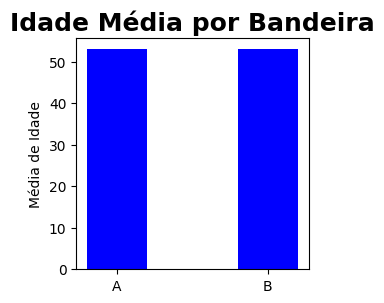

In [32]:
fig = plt.figure(figsize=(3,3))

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], width=0.4, color="blue")

plt.ylabel("Média de Idade")

plt.title("Idade Média por Bandeira", loc="center", fontsize=18, fontweight="bold", color="black")

###Média de renda para cada tipo de canal de venda

Text(0.5, 1.0, 'Renda Média por Canal de Venda')

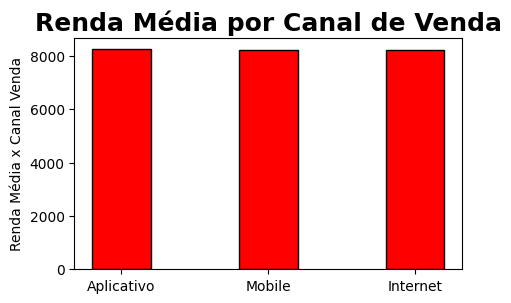

In [35]:
fig = plt.figure(figsize=(5,3))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], width=0.4, color="red", edgecolor="black")

plt.ylabel("Renda Média x Canal Venda")

plt.title("Renda Média por Canal de Venda", loc="center", fontsize=18, fontweight="bold", color="black")

###Quantidade de vendas por mês

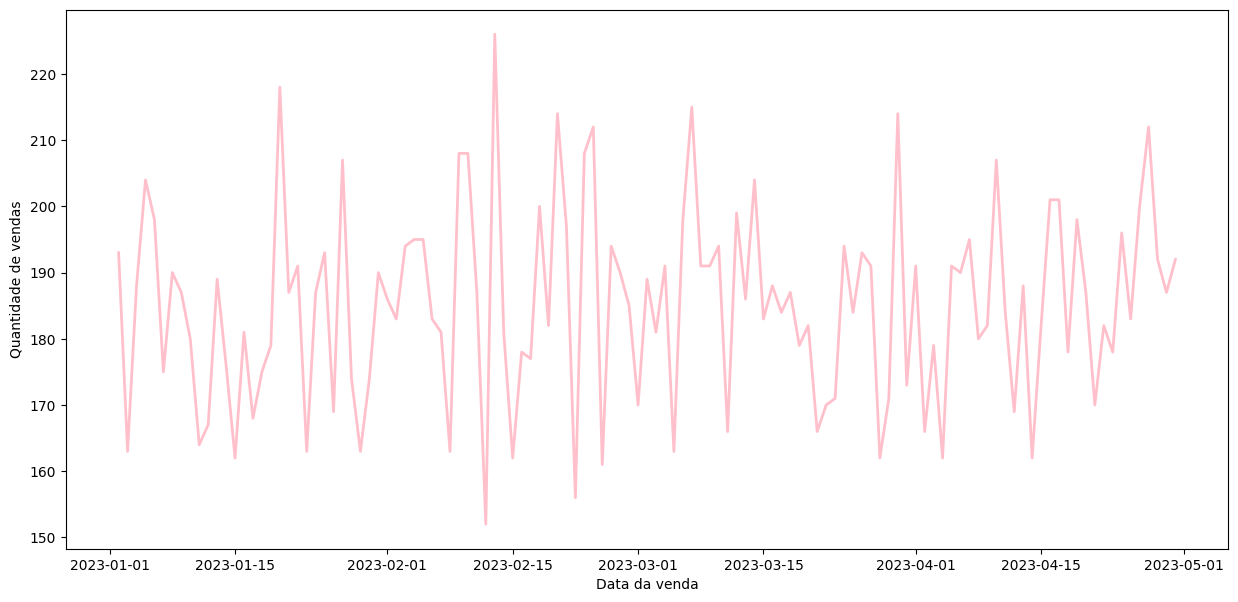

In [37]:
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()

venda_por_data

fig = plt.figure(figsize=(15,7))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.plot(x, y, color="pink", mfc="black", ms=0.9, animated=1, linewidth = 2)

###Média de preço com frete por Nome de Departamento

In [40]:
agg_dep_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

agg_dep_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Text(0.5, 1.0, 'Preço Médio por Departamento')

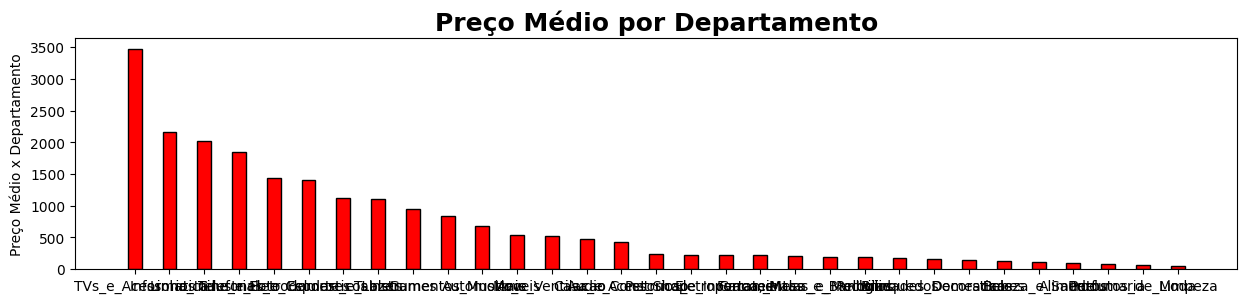

In [43]:
fig = plt.figure(figsize=(15,3))

plt.bar(agg_dep_preco["Nome_Departamento"], agg_dep_preco["Preço_com_frete"], width=0.4, color="red", edgecolor="black")

plt.ylabel("Preço Médio x Departamento")

plt.title("Preço Médio por Departamento", loc="center", fontsize=18, fontweight="bold", color="black")

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [53]:
px.bar(agg_dep_preco, x = "Nome_Departamento", y = "Preço_com_frete")